Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(13770, 1, 10) (13770,) (1530, 1, 10) (1530,)
Epoch 1/100
192/192 - 1s - loss: 0.0390 - val_loss: 0.0341
Epoch 2/100
192/192 - 0s - loss: 0.0320 - val_loss: 0.0277
Epoch 3/100
192/192 - 0s - loss: 0.0262 - val_loss: 0.0212
Epoch 4/100
192/192 - 0s - loss: 0.0204 - val_loss: 0.0139
Epoch 5/100
192/192 - 0s - loss: 0.0158 - val_loss: 0.0125
Epoch 6/100
192/192 - 0s - loss: 0.0151 - val_loss: 0.0143
Epoch 7/100
192/192 - 0s - loss: 0.0145 - val_loss: 0.0116
Epoch 8/100
192/192 - 0s - loss: 0.0148 - val_loss: 0.0118
Epoch 9/100
192/192 - 0s - loss: 0.0150 - val_loss: 0.0144
Epoch 10/100
192/192 - 0s - loss: 0.0142 - val_loss: 0.0117
Epoch 11/100
192/192 - 0s - loss: 0.0147 - val_loss: 0.0110
Epoch 12/100
192/192 - 0s - loss: 0.0145 - val_loss: 0.0115
Epoch 13/100
192/192 - 0s - loss: 0.0139 - val_loss: 0.0115
Epoch 14/100
192/192 - 0s - loss: 0.0135 - val_loss:

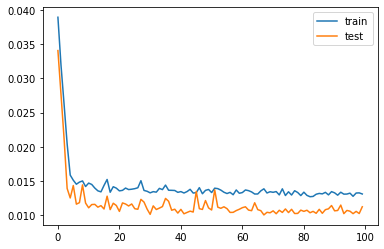

In [10]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import numpy as np
import pandas as pd
import csv

from os.path import join

#from keras.optimizers import RMSprop
#opt = RMSprop()
#model.compile(..., optimizer=opt)


ROOT = '/content/drive/'
#PROJ = 'My Drive/Colab Notebooks/' # You need to change this parameter according to your real path.
DATA = 'My Drive/Colab Notebooks/DeepLib/LSTM/Lib1/Round10/' # You need to change this parameter according to your real path.
#SUB_FOLDER = 'Round1'
#WORKING_PATH = join(ROOT, DATA)
DATA_PATH = join(ROOT, DATA)

EPOCHS = 100
splitting = 13770


from google.colab import drive
drive.mount(ROOT,force_remount=False)


#======Read and preprocess the data==================

# load dataset
input_file = join(DATA_PATH,'input_data.csv') 
dataset = read_csv(input_file, header=None, index_col=0)
values = dataset.values


#Get the real labels of the testing data
test_labels = values[splitting:, :]
test_labels = test_labels[:,-1]
test_labels = test_labels.reshape((len(test_labels), 1))
np.savetxt(join(DATA_PATH,'TestLabels.csv'), test_labels, delimiter=",",fmt='%s')

#Get the real labels of the training data
train_labels = values[:splitting, :]
train_labels = train_labels[:,-1]
train_labels = train_labels.reshape((len(train_labels), 1))
#Save to file
np.savetxt(join(DATA_PATH,'TrainLabels.csv'), train_labels, delimiter=",",fmt='%s')






#print(len(test_labels))

#val = test_labels[2987]
#print(test_labels[2987])

#test_labels = test_labels.reshape((len(test_labels), 1))

#print(test_labels[2987,0])

#try with an encoder
#encoder = LabelEncoder()
#encoder.fit([1, 2, 2, 6, 8, 11, 40, 50])
#encoder.transform([1, 2, 2, 11]) 



# integer encode direction

#Lib1:
temp = concatenate((values[:,0], values[:,-1]))
encoder0 = LabelEncoder()
encoder0.fit(temp)
values[:,0] = encoder0.transform(values[:,0])
#The last column
values[:,-1] = encoder0.transform(values[:,-1])



#Lib2
encoder1 = LabelEncoder()
encoder1.fit(values[:,1])
values[:,1] = encoder1.transform(values[:,1])


#Lib3
encoder2 = LabelEncoder()
encoder2.fit(values[:,2])
values[:,2] = encoder2.transform(values[:,2])


#Lib4:
encoder3 = LabelEncoder()
encoder3.fit(values[:,3])
values[:,3] = encoder3.transform(values[:,3])


#Lib5:
encoder4 = LabelEncoder()
encoder4.fit(values[:,4])
values[:,4] = encoder4.transform(values[:,4])

#===============the last column shares the same encoder with the first column
#values[:,5] = encoder0.transform(values[:,5])


#==========================Dataset 2==========================
#Lib6:
encoder5 = LabelEncoder()
encoder5.fit(values[:,5])
values[:,5] = encoder5.transform(values[:,5])

#Lib7:
encoder6 = LabelEncoder()
encoder6.fit(values[:,6])
values[:,6] = encoder6.transform(values[:,6])

#Lib8:
encoder7 = LabelEncoder()
encoder7.fit(values[:,7])
values[:,7] = encoder7.transform(values[:,7])


#Lib9:
encoder8 = LabelEncoder()
encoder8.fit(values[:,8])
values[:,8] = encoder8.transform(values[:,8])

#Lib10
encoder9 = LabelEncoder()
encoder9.fit(values[:,9])
values[:,9] = encoder9.transform(values[:,9])




# values[:,4] = encoder.fit_transform(values[:,4])
# convert the data into float
values = values.astype('float32')


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values);
scaled = scaler.transform(values)


#scaled = scaler.fit_transform(values)
#print(scaled)

# split into train and test sets
values = scaled


train = values[:splitting, :]
test = values[splitting:, :]




# split into input and outputs
train_X, train_Y = train[:, :-1], train[:, -1]
test_X, test_Y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# the LSTM network
model = Sequential()
model.add(LSTM(40, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
#model.compile(loss='mae', optimizer=opt)

#model.compile(loss='mae', optimizer='adam', metrics=["accuracy"])
# fit network
#history = model.fit(train_X, train_Y, epochs=200, batch_size=72, validation_split = 0.1)
#history = model1.fit(train_x, train_Y,validation_split = 0.1, epochs=50, batch_size=4)

history = model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=72, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

model.summary()

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#loss_train = history.history['acc']
#loss_val = history.history['val_acc']

plt.legend()
plt.show()



# make a prediction
yhat = model.predict(test_X)
#print(yhat.shape)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))




#print(yhat)
#print('=====================================')

#print(yhat.shape)

#df = pd.DataFrame({"name1" : test_Y, "name2" : test_labels}) 
#print(df)
#print(yhat)

test_Y = test_Y.reshape((len(test_Y), 1))

#print(test_Y)


#==============save results to a single file==============

np.savetxt(join(DATA_PATH,'TrainEncodedLabels.csv'), train_Y.reshape((len(train_Y), 1)), delimiter=",")
#np.savetxt(join(DATA_PATH,'GroundTruth.csv'), test_Y, delimiter=",")
np.savetxt(join(DATA_PATH,'Prediction.csv'), yhat, delimiter=",")



#results = concatenate((test_Y,yhat), axis=1)
#np.savetxt(join(DATA_PATH,'Results.csv'), results, delimiter=",")


#default_text = 'abcd'

#temp = encoder0.inverse_transform(test_Y)
#print(temp)


